In [1]:
import os

In [2]:
os.environ['MKL_THREADING_LAYER'] = 'GNU'

In [3]:
import theano

In [4]:
import theano.tensor as T

### Theano 
1. 심볼 변수 정의
2. 심볼 관계 정의
3. 심볼 함수 정의
4. 심볼 함수 사용

#### 1. 심볼 변수 정의
- dscalar : 스칼라 정의
- vector : 벡터 정의
- dmatrix : 매트릭스 정의

In [5]:
x1 = T.dscalar('x1')
y1 = T.dscalar('y1')

In [6]:
type(x1), type(y1)

(theano.tensor.var.TensorVariable, theano.tensor.var.TensorVariable)

In [7]:
x2 = T.dvector('x2')
y2 = T.dvector('y2')
type(x2), type(y2)

(theano.tensor.var.TensorVariable, theano.tensor.var.TensorVariable)

In [8]:
x3 = T.dmatrix('x3')
y3 = T.dmatrix('y3')
type(x3), type(y3)

(theano.tensor.var.TensorVariable, theano.tensor.var.TensorVariable)

#### 2. 심볼 관계 정의

In [9]:
z1 = x1 + y1
type(z1)

theano.tensor.var.TensorVariable

In [10]:
u1 = T.exp(z1)
type(u1)

theano.tensor.var.TensorVariable

In [11]:
z2 = T.dot(x2,y2)
type(z2)

theano.tensor.var.TensorVariable

In [12]:
z3 = T.sum(x3) + T.sum(y3)
type(z3)

theano.tensor.var.TensorVariable

##### *심볼 프린트

In [13]:
theano.printing.pprint(x1)

'x1'

In [14]:
theano.printing.pprint(y1)

'y1'

In [15]:
theano.printing.pprint(u1)

'exp((x1 + y1))'

In [16]:
theano.printing.pprint(z2)

'(x2 \\dot y2)'

In [17]:
from IPython.display import SVG

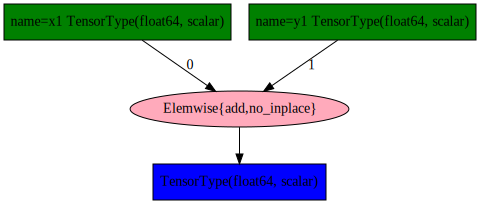

In [18]:
SVG(theano.printing.pydotprint(z1, return_image=True, format='svg'))

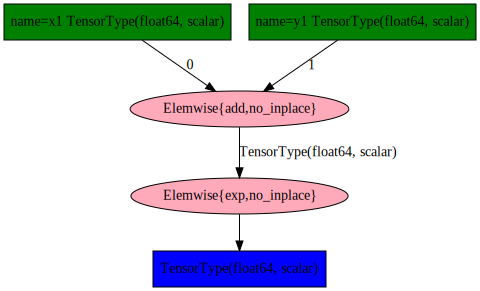

In [19]:
SVG(theano.printing.pydotprint(u1, return_image=True, format='svg'))

#### 3. 심볼 함수 정의
- theano.function 명령으로 심볼함수 정의
- 입력 심볼변수, 출력 심볼변수 지정
- 출력 심볼변수는 입력변수의 연산으로 정의되어야 함.

In [20]:
f1 = theano.function(inputs=[x1, y1], outputs=z1)

In [21]:
f2 = theano.function([x2, y2], z2)

In [22]:
f1(1,2)

array(3.)

In [32]:
f2([1,2],[3,4])

array(11.)

In [28]:
f3 = theano.function(inputs=[x3,y3], outputs=z3)

In [29]:
theano.printing.pprint(z3)

'(Sum{acc_dtype=float64}(x3) + Sum{acc_dtype=float64}(y3))'

In [33]:
f3([[1,2]],[[3,4]])

array(10.)

In [34]:
f3([[1],[2]],[[3],[4]])

array(10.)

In [36]:
# 로지스틱함수
s1 = 1 / (1 + T.exp(-x1))
logistic = theano.function(inputs=[x1], outputs=s1)
logistic(1)

array(0.73105858)

s1으로 변수관계설정, logistic으로 함수정의

In [37]:
s2 = 1 / (1 + T.exp(-x2))
logistic2 = theano.function([x2], s2)
logistic2([0,1])

array([0.5       , 0.73105858])

In [40]:
# 난수 발생
# RandomStreams
from theano.tensor.shared_randomstreams import RandomStreams
srng = RandomStreams(0)

In [41]:
rv_u = srng.uniform()
f_rv_u = theano.function([], rv_u)

In [42]:
f_rv_u(), f_rv_u(), f_rv_u(), f_rv_u()

(array(0.48604732), array(0.68571232), array(0.98557605), array(0.19559641))

### 변수 갱신
예를 들어 $w_{(k+1)}$ = $w_{k}$+ x 와 같은 형태

In [43]:
x = T.dscalar('x')
y = x
w = theano.shared(0.0, name='w') # 초기값 0
update = theano.function([x],y, updates=[(w, w+x)])

In [46]:
w.set_value(f_rv_u())
w.get_value()

array(0.58341167)

In [47]:
update(1)
w.get_value()

array(1.58341167)

In [48]:
update(2)
w.get_value()

array(3.58341167)

### 그래프 최적화
- 빠른 함수 계산을 위한 계산지원

In [51]:
x1 = T.dvector('x1')
y1 = x1 ** 10
f1 = theano.function([x1], y1)

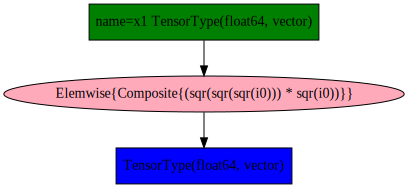

In [52]:
SVG(theano.printing.pydotprint(f1, return_image=True, format='svg'))

x1의 10제곱을 하나하나 하지 않고, x^2^2^2 * x^2...형태로 계산 

계산량이 곱하기 9번에서 4번으로 감소

### 미분 

In [53]:
x1 = T.dscalar('x1')
y1 = x1 ** 2
gy1 = T.grad(y1, x1)
fy1 = theano.function([x1], y1)
fgy1 = theano.function([x1], gy1)

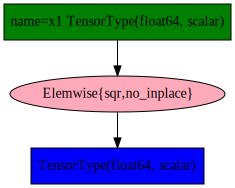

In [54]:
SVG(theano.printing.pydotprint(fy1, return_image=True, format='svg'))

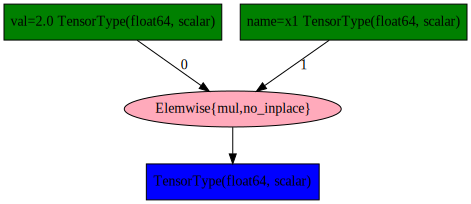

In [55]:
SVG(theano.printing.pydotprint(fgy1, return_image=True, format='svg'))

In [56]:
# 로지스틱
x1 = T.dscalar('x1')
s1 = 1 / (1 + T.exp(-x1))
logistic = theano.function([x1],s1)
gs1 = T.grad(s1, x1)
glogistic = theano.function([x1],gs1)

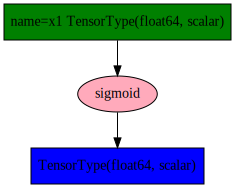

In [57]:
SVG(theano.printing.pydotprint(logistic, return_image=True, format='svg'))

알아서 sigmoid함수라고 인식하고 이미 내장되어있는 sigmoid함수를 불러와 연산속도를 높임

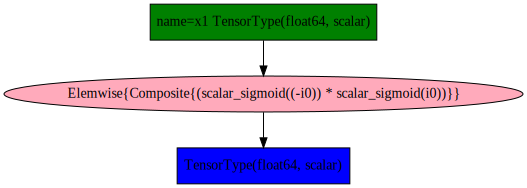

In [58]:
SVG(theano.printing.pydotprint(glogistic, return_image=True, format='svg'))

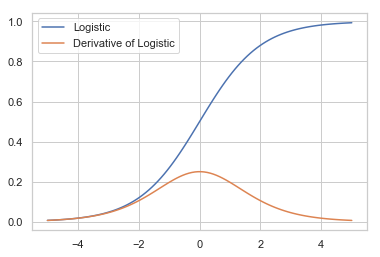

In [59]:
xx = np.linspace(-5, 5, 100)
y1 = np.hstack([logistic(xi) for xi in xx])
y2 = np.hstack([glogistic(xi) for xi in xx])

plt.plot(xx, y1, label="Logistic")
plt.plot(xx, y2, label="Derivative of Logistic")
plt.legend()
plt.show()

### 퍼셉트론 구현

In [71]:
from sklearn.datasets import load_iris
iris = load_iris()

In [72]:
idx = np.in1d(iris.target, [0,2])
x = iris.data[idx, 0:2]
y = iris.target[idx] - 1 # y값이 1 or -1 값을 가지도록...

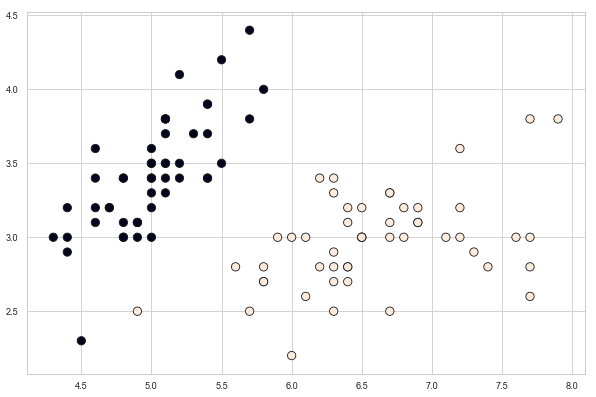

In [62]:
plt.figure(figsize=(12,8), dpi=60)
plt.scatter(x[:,0], x[:,1], c=y, s=100, edgecolors='k')
plt.show()

In [77]:
X = T.dmatrix('x')
Y = T.dvector('y')
np.random.seed(0)
w = theano.shared(0.001 * np.random.randn(2), name='w')
b = theano.shared(0.001 * np.random.randn(1)[0], name='b')
z = T.tanh(T.dot(X,w) + b) # heavy side function
cost = T.sum(T.maximum(0, -Y*z))

In [78]:
gw, gb = T.grad(cost, [w,b]) # cost함수를 w, b로 각각 미분한 값을 gw, gb로 받는다.
mu = 1e-7
train = theano.function([X,Y], cost, updates=[(w, w - mu*gw), (b, b-mu*gb)])

w를 w-mu * gw로 대체, b를 b-mu * gb로 대체하여 최적값을 찾아간다.

In [79]:
for i in range(100):
    cost_i = train(x, y)
    if i % 10 == 0:
        print("{} : ".format(i), cost_i)

0 :  0.5588424928848522
10 :  0.4645058718722919
20 :  0.3701625011442721
30 :  0.27581374670328085
40 :  0.18146097498533956
50 :  0.08710555275029427
60 :  0.0017481157550485488
70 :  0.0003194822026270444
80 :  0.00029294220762885446
90 :  0.00029210620994642254


In [83]:
y_pred = T.sgn(z) # -1~1사잇값 ==> -1 또는 1 변환
y_pred_func = theano.function([X], y_pred)
y_hat = y_pred_func(x)
y_hat

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.])

In [84]:
from sklearn.metrics import confusion_matrix

In [85]:
confusion_matrix(y, y_hat)

array([[49,  1],
       [ 1, 49]], dtype=int64)

##### 연습문제
위 퍼셉트론 코드를 다음과 같이 고쳐라.

1. y값은 0과 1이라는 값만 가진다.
2. 활성화 함수는 로지스틱 함수를 사용한다.
3. 코스트 함수는 다음과 같은 오차 제곱 함수를 사용한다.
$$ C=∑_{i=1}^N (y−y_{hat})^2 $$

In [128]:
# y값을 0, 1로 바꾸자
idx = np.in1d(iris.target, [0,2])
x = iris.data[idx,0:2]
y = iris.target[idx] * 0.5

In [197]:
# 활성화함수를 tanh가 아닌 logistic으로 바꿔준다
X = T.dmatrix('X')
Y = T.vector('Y')
np.random.seed(0)
w = theano.shared(0.01 * np.random.randn(2), name='w')
b = theano.shared(0.01 * np.random.randn(1)[0], name='b')
a = T.dot(X,w) + b
z = 1 / (1 + T.exp(-a)) # 0~1값을 갖는다.
cost = T.sum((Y - z)**2)

In [198]:
gw, gb = T.grad(cost, [w,b])
mu = 0.01
train = theano.function([X,Y], cost, updates=[(w,w-mu*gw),(b,b-mu*gb)])

In [199]:
for i in range(100):
    cost_i = train(x,y)
    if i%10 == 0:
        print("{:4d}: ".format(i), cost_i)

   0:  24.77347311486501
  10:  45.533036666210414
  20:  27.246506305791826
  30:  17.844560887575163
  40:  29.517666024609717
  50:  4.644198551389643
  60:  14.642362476231819
  70:  11.634128838441296
  80:  2.117699559278093
  90:  2.0469300998461377


In [200]:
y_pred = T.round(z) # sgn이 아니라 round써야함
y_pred_func = theano.function([X], y_pred)
y_hat = y_pred_func(x)
y_hat

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [201]:
confusion_matrix(y,y_hat)

array([[49,  1],
       [ 0, 50]], dtype=int64)